# Importamos Librerias de Python

In [1]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
import matplotlib.pyplot as plt
import numpy as np

# Preparando data para el analisis

#### Paso 1: Importamos la data

In [2]:
mydata = pd.read_csv("prot.csv") # comando para subir la data
mydata.head(3) # comando para visualizar la data

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s38,s39,s40,s41,s42,s43,s44,s45,s46,F
0,-2.92,-7.15,-8.32,-7.48,-4.33,-6.17,-7.55,-5.78,-3.48,-7.33,...,-7.63,-8.88,-7.03,-3.62,-8.04,-6.17,-4.33,-7.48,-7.65,2.4044
1,-10.59,-3.52,-6.09,-2.47,-3.38,-7.68,-10.83,-10.44,-11.32,-9.98,...,-3.96,-8.11,-7.07,-10.22,-11.69,-9.26,-7.00,-3.97,-7.81,2.2380
2,-8.93,-8.06,-7.47,-4.91,-2.42,-2.37,-9.01,-9.43,-3.12,-2.52,...,-7.40,-8.52,-8.20,-7.03,-3.22,-7.83,-5.23,-10.74,-10.83,2.0745


#### Paso 2: Separamos variables dependientes (y) de independientes (x)

In [3]:
var_dep = mydata["F"] # cogemos la columna de nombre insuranceclaim
var_ind = mydata.drop(["F"],axis=1) # cogemos TODAS las columnas menos la que dice insuranceclaim (drop)
#var_ind = mydata[["s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","s13","s14","s15","s16","s17","s18","s19","s20","s21"]]
var_ind.head(3)

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46
0,-2.92,-7.15,-8.32,-7.48,-4.33,-6.17,-7.55,-5.78,-3.48,-7.33,...,-7.08,-7.63,-8.88,-7.03,-3.62,-8.04,-6.17,-4.33,-7.48,-7.65
1,-10.59,-3.52,-6.09,-2.47,-3.38,-7.68,-10.83,-10.44,-11.32,-9.98,...,-7.10,-3.96,-8.11,-7.07,-10.22,-11.69,-9.26,-7.00,-3.97,-7.81
2,-8.93,-8.06,-7.47,-4.91,-2.42,-2.37,-9.01,-9.43,-3.12,-2.52,...,-8.60,-7.40,-8.52,-8.20,-7.03,-3.22,-7.83,-5.23,-10.74,-10.83


#### Paso 3: Normalizamos la data  (warning)

In [4]:
var_ind_norm = StandardScaler().fit_transform(var_ind) # reescala la data
print("ready")

ready


#### Paso 4: Dividimos la data en data de entrenamiento y data de testeo

In [5]:
x_train, x_test, y_train, y_test = train_test_split(var_ind_norm, var_dep, test_size=0.25, random_state=0)
print("ready")

ready


# Boosting en 4 pasos

#### Paso 1: Importamos el modelo que queremos usar.

In [6]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

#### Paso 2: Creamos una variable de clase Regresion Logistica

In [8]:
gb=GradientBoostingRegressor(max_depth=5,n_estimators=300,learning_rate=0.1)

#### Paso 3: Entrenamos el modelo basado en la data

In [9]:
gb.fit(x_train, y_train) # entrena el modelo (data de entrenamie)
print("ready")

ready


#### Paso 4: Predecimos usando el modelo entrenado

In [10]:
predictions = gb.predict(x_test)
print("ready") # revisa si termino el codigo (rstc)

ready


# Calculando la precision

In [11]:
gb.score(x_test,y_test)

0.2135681864741847

## Importancia de los inputs!

In [12]:
gb.feature_importances_

array([0.01584956, 0.01489957, 0.02543797, 0.02026955, 0.0214087 ,
       0.01389212, 0.0182545 , 0.02641671, 0.03090737, 0.02111231,
       0.01758752, 0.01604964, 0.02330861, 0.02770364, 0.02311047,
       0.01830377, 0.02103249, 0.02371541, 0.0433845 , 0.03156724,
       0.01928579, 0.01969904, 0.0179927 , 0.0306819 , 0.02564782,
       0.01828052, 0.02347708, 0.01763536, 0.0307961 , 0.03094178,
       0.01971308, 0.02107152, 0.01836163, 0.01918254, 0.03379682,
       0.01818342, 0.01827305, 0.01434857, 0.01855145, 0.02489113,
       0.01783893, 0.01334264, 0.0141693 , 0.01783965, 0.02374155,
       0.01804497])

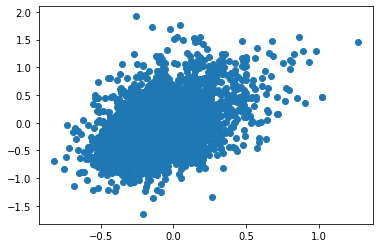

In [13]:
plt.plot(predictions,y_test,'o')